In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder  
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt

In [21]:
path = 'data/第一年一季度生产情况.csv'
chunk_size = 1000  # 设置每次读取的行数
dataframes = pd.read_csv(path, chunksize=chunk_size)
df = pd.concat(dataframes)
df.drop(['井号', '日期','生产时间','套压', '油压','日产气','输压','历年累计产气量', '甜点分区', '生产天数','设计压裂段长(m)'], axis=1, inplace=True)

21780
龙一11水平长度(m): 0.28366646109899424
龙一11(1类厚度)(m): 0.18147684565734523
平均单段液量(m3): 0.05697052324324197
陶粒比例（%）: 0.05477227344428497
40/70目陶粒(t): 0.04400652109938436
用液强度(m3/m): 0.030084893973393784
总液量(m3): 0.02071110589395484
滑溜水(m3): 0.020219726958938054
加砂强度(t/m): 0.019738988757232224
焖井时间(天): 0.01862682412909846
排量（m3/min）: 0.017203380071591414
研究所复核储量丰度-2023.6.30(108m3/km2): 0.01682325005339691
优质页岩钻遇率（%）: 0.015464513579537018
龙一11厚度(m): 0.015464115107457528
主体射孔密度(P/m): 0.015252643525026371
龙一11底以上4米箱体钻遇率（%）: 0.014859229473630341
I类储层连续厚度(m): 0.014050179714667339
I类储层厚度(m): 0.01382418589166005
分段段长(m): 0.013504451392968716
开始排液时井口套压(MPa): 0.012677175404809123
实际射孔簇数: 0.012295852754811374
龙一11钻遇率(%): 0.01124578792504795
平均单段砂量(t): 0.00946852700770591
弱凝胶(m3): 0.009244585445124296
主体单段簇数: 0.00913612721189239
投产前返排率(%): 0.008376101362202895
簇间距(m): 0.008300889220334343
线性胶(m3): 0.00822349084528219
100目石英砂(t): 0.006783822956959986
平均停泵压力(MPa): 0.006512634488937097
总砂量(t): 0.005593

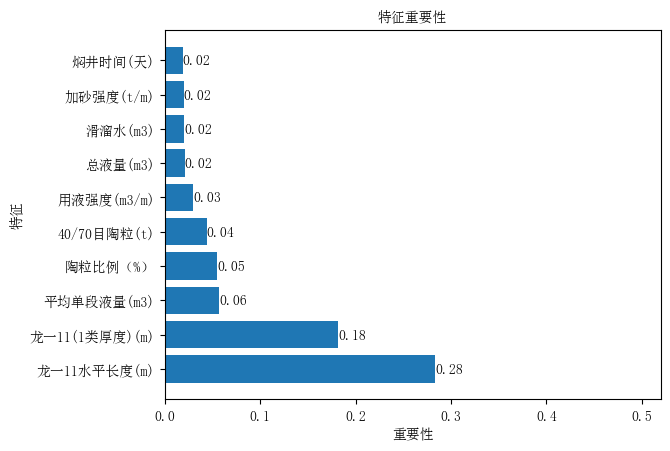

In [20]:
path = 'data/第一年一季度生产情况.csv'
# path = 'data/第一年二季度生产情况.csv'
# path = 'data/第一年三季度生产情况.csv'
# path = 'data/第一年四季度生产情况.csv'
# path = 'data/第二年一季度生产情况.csv'
# path = 'data/第二年二季度生产情况.csv'
# path = 'data/第二年三季度生产情况.csv'
# path = 'data/第二年四季度生产情况.csv'
# path = 'data/第三年一季度生产情况.csv'
# path = 'data/第三年二季度生产情况.csv'
# path = 'data/第三年三季度生产情况.csv'
# path = 'data/第三年四季度生产情况.csv'
# path = 'data/第四年生产情况.csv'
# path = 'data/第五年生产情况.csv'
# path = 'data/第六年生产情况.csv'
# path = '第一年四季度生产情况.csv'
chunk_size = 1000  # 设置每次读取的行数
dataframes = pd.read_csv(path, chunksize=chunk_size)
df = pd.concat(dataframes)

print(len(df))

df.drop(['井号', '日期','生产时间','套压', '油压','日产气','输压','历年累计产气量', '甜点分区', '生产天数','设计压裂段长(m)'], axis=1, inplace=True)
y_name = '排名'
feature_names = df.columns.tolist()
# 使用列表推导式删除特定值
feature_names = [x for x in feature_names if x != y_name]
y = df[y_name]
X = df[feature_names]
from matplotlib.font_manager import FontProperties
my_model = RandomForestRegressor().fit(X, y)

sorted_importances = []
sorted_features = []
# 打印每个特征的重要性程度
feature_importances = list(zip(X.columns, my_model.feature_importances_))
feature_importances.sort(key=lambda x: x[1], reverse=True)  # 按重要性程度进行降序排序

for feature, importance in feature_importances:
    feature = feature.replace('\n', '')
    sorted_features.append(feature)
    sorted_importances.append(importance)
    print(f"{feature}: {importance}")

sorted_features = sorted_features[0:10]
sorted_importances = sorted_importances[0:10]

# 设置中文字体
font = FontProperties(fname=r"SimSun.ttf")  # 替换成你电脑上的中文字体文件路径
plt.rcParams['font.sans-serif'] = [font.get_name()]  # 在绘制时使用这个字体  
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号  

fig, ax = plt.subplots()
ax.set_xlim(0, 0.52)
bars = ax.barh(sorted_features, sorted_importances)
ax.set_xlabel("重要性", fontproperties=font)
ax.set_ylabel("特征", fontproperties=font)
ax.set_title("特征重要性", fontproperties=font )
for bar in bars:
    width = bar.get_width()
    # ax.text(width, bar.get_y() + bar.get_height() / 2, '%.3e' % width, ha='left', va='center')
    ax.text(width, bar.get_y() + bar.get_height() / 2, "{:.2f}".format(width), ha='left', va='center')
plt.savefig('img/feature_importances.png', dpi=600, bbox_inches='tight')
plt.show()

In [4]:
# 保存为csv文件
# df.to_csv('df.csv', index=True, encoding='gbk')

In [22]:
y_name = '排名'
feature_names = df.columns.tolist()
# 使用列表推导式删除特定值
feature_names = [x for x in feature_names if x != y_name]
y = df[y_name]
X = df[feature_names]

# 保存原始的columns和index
# columns = feature_names
# index = df.index

# 使用MinMaxScaler进行归一化
# scaler = MinMaxScaler()  # 创建MinMaxScaler对象
# X = pd.DataFrame(scaler.fit_transform(X), columns=columns, index=index)


In [23]:
# train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=2023)
# # 打印训练集和测试集的形状
# print("训练集X的形状:", train_X.shape)
# print("训练集y的形状:", train_y.shape)
# print("验证集X的形状:", val_X.shape)
# print("验证集y的形状:", val_y.shape)
# my_model = RandomForestRegressor(random_state=0).fit(train_X, train_y)

#接收模型 (​model​)、特征 (​X​)、目标变量 (​y​) 和交叉验证的折数 (​k​) 作为输入，并返回交叉验证得到的均方根误差 (​rmse​)
def calculate_rmse(model, X, y, k=5):
    mse_scores = -cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error')
    rmse = np.sqrt(np.mean(mse_scores))
    return rmse


# 随机森林
randomforest_model = RandomForestRegressor()
randomforest_rmse = calculate_rmse(randomforest_model, X, y)
print("RandomForestRegressor交叉验证的均方根误差：", randomforest_rmse)

# MLP（多层感知器）
mlp_model = MLPRegressor()
mlp_rmse = calculate_rmse(mlp_model, X, y)
print("MLPRegressor交叉验证的均方根误差：", mlp_rmse)

# 线性回归
linear_model = LinearRegression()
linear_rmse = calculate_rmse(linear_model, X, y)
print("LinearRegression交叉验证的均方根误差：", linear_rmse)

# 支持向量回归
svr_model = SVR()
svr_rmse = calculate_rmse(svr_model, X, y)
print("SVR交叉验证的均方根误差：", svr_rmse)

# 决策树回归
dtr_model = DecisionTreeRegressor()
dtr_rmse = calculate_rmse(dtr_model, X, y)
print("DecisionTreeRegressor交叉验证的均方根误差：", dtr_rmse)

# K近邻回归
knr_model = KNeighborsRegressor()
knr_rmse = calculate_rmse(knr_model, X, y)
print("KNeighborsRegressor交叉验证的均方根误差：", knr_rmse)

# Gradient Boosting
gbr_model = GradientBoostingRegressor()
gbr_rmse = calculate_rmse(gbr_model, X, y)
print("GradientBoostingRegressor交叉验证的均方根误差：", gbr_rmse)

# AdaBoost回归
adaboost_model = AdaBoostRegressor()
adaboost_rmse = calculate_rmse(adaboost_model, X, y)
print("AdaBoostRegressor交叉验证的均方根误差：", adaboost_rmse)

# Bagging回归
bagging_model = BaggingRegressor()
bagging_rmse = calculate_rmse(bagging_model, X, y)
print("BaggingRegressor交叉验证的均方根误差：", bagging_rmse)

# Lasso回归
lasso_model = Lasso()
lasso_rmse = calculate_rmse(lasso_model, X, y)
print("Lasso交叉验证的均方根误差：", lasso_rmse)

# Ridge回归
ridge_model = Ridge()
ridge_rmse = calculate_rmse(ridge_model, X, y)
print("Ridge交叉验证的均方根误差：", ridge_rmse)

# ElasticNet回归
elasticnet_model = ElasticNet()
elasticnet_rmse = calculate_rmse(elasticnet_model, X, y)
print("ElasticNet交叉验证的均方根误差：", elasticnet_rmse)


RandomForestRegressor交叉验证的均方根误差： 70.98961591245684
MLPRegressor交叉验证的均方根误差： 107.59911295744492
LinearRegression交叉验证的均方根误差： 9558430484.537764
SVR交叉验证的均方根误差： 68.96623029976305
DecisionTreeRegressor交叉验证的均方根误差： 81.88135781961732
KNeighborsRegressor交叉验证的均方根误差： 77.97221345854781
GradientBoostingRegressor交叉验证的均方根误差： 63.38678635591069
AdaBoostRegressor交叉验证的均方根误差： 63.26267675931092
BaggingRegressor交叉验证的均方根误差： 71.80681714429325


E:\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.954e+07, tolerance: 7.655e+03
  model = cd_fast.enet_coordinate_descent(
E:\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.573e+07, tolerance: 8.786e+03
  model = cd_fast.enet_coordinate_descent(
E:\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.122e+07, tolerance: 8.386e+03
  model = cd_fast.en

Lasso交叉验证的均方根误差： 106.56865882693783
Ridge交叉验证的均方根误差： 133.58085050344297


E:\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.873e+07, tolerance: 7.655e+03
  model = cd_fast.enet_coordinate_descent(
E:\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.281e+07, tolerance: 8.786e+03
  model = cd_fast.enet_coordinate_descent(
E:\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.917e+07, tolerance: 8.386e+03
  model = cd_fast.en

ElasticNet交叉验证的均方根误差： 70.29562372230552


E:\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.868e+06, tolerance: 8.656e+03
  model = cd_fast.enet_coordinate_descent(


龙一11水平长度(m): 0.3182255332924769
龙一11底以上4米箱体钻遇率（%）: 0.07471900057097342
I类储层厚度(m): 0.06721994942052464
总砂量(t): 0.0548418552588705
100目石英砂(t): 0.030820764900451193
线性胶(m3): 0.03052953924410894
研究所复核储量丰度-2023.6.30(108m3/km2): 0.029619500812405514
主体单段簇数: 0.026291438562025496
投产前累计排液量(m3): 0.022836308679590037
主体射孔密度(P/m): 0.02267764973800871
合压长度(m): 0.021518459348704923
实际射孔簇数: 0.018456273871289536
龙一11厚度(m): 0.01717041730426426
水平段长(m): 0.01625892819159223
平均单段液量(m3): 0.015688554701175108
投产前返排率(%): 0.014819913566497128
分段段长(m): 0.014328641628055031
加砂强度(t/m): 0.013955316621373524
开始排液时井口套压(MPa): 0.013402972783493502
I类储层连续厚度(m): 0.01294110022298155
总液量(m3): 0.012747779969920646
40/70目陶粒(t): 0.01233804771722573
压裂结束停泵压力(MPa): 0.012056194733185583
排量（m3/min）: 0.011700386645560952
弱凝胶(m3): 0.011543614682794039
滑溜水(m3): 0.010340262296926576
用液强度(m3/m): 0.010093367466331807
陶粒比例（%）: 0.00997937748990474
平均停泵压力(MPa): 0.009794748551306656
龙一11(1类厚度)(m): 0.00882746549463761
焖井时间(天): 0.008173998

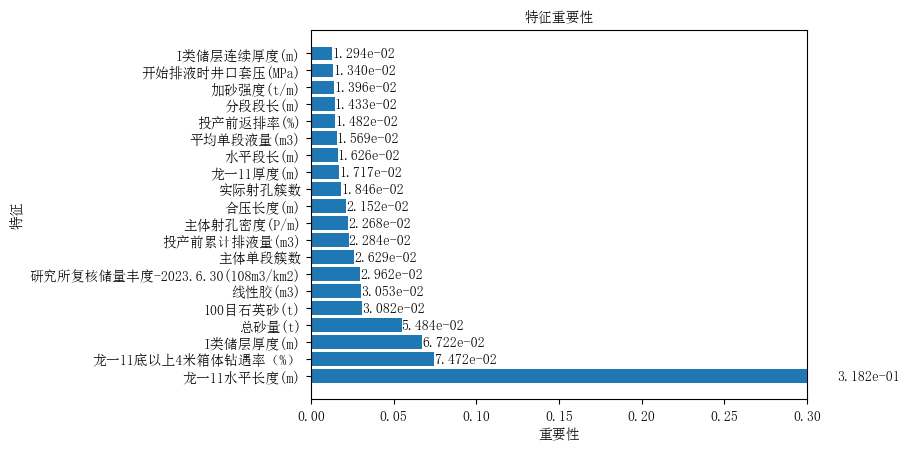

In [25]:
from matplotlib.font_manager import FontProperties
my_model = RandomForestRegressor().fit(X, y)
# my_model = AdaBoostRegressor(random_state=2023).fit(X, y)
# pred_y = my_model.predict(val_X)
# mse = mean_squared_error(val_y, pred_y)
# rmse = np.sqrt(mse)
# print("验证集的均方根误差：", rmse)

# viz = FeatureImportances(my_model)
# viz.fit(val_X, val_y)
# viz.show()

sorted_importances = []
sorted_features = []
# 打印每个特征的重要性程度
feature_importances = list(zip(X.columns, my_model.feature_importances_))
feature_importances.sort(key=lambda x: x[1], reverse=True)  # 按重要性程度进行降序排序

for feature, importance in feature_importances:
    feature = feature.replace('\n', '')
    sorted_features.append(feature)
    sorted_importances.append(importance)
    print(f"{feature}: {importance}")

sorted_features = sorted_features[0:20]
sorted_importances = sorted_importances[0:20]

# 设置中文字体
font = FontProperties(fname=r"SimSun.ttf")  # 替换成你电脑上的中文字体文件路径
plt.rcParams['font.sans-serif'] = [font.get_name()]  # 在绘制时使用这个字体  
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号  

fig, ax = plt.subplots()
ax.set_xlim(0, 0.3)
bars = ax.barh(sorted_features, sorted_importances)
ax.set_xlabel("重要性", fontproperties=font)
ax.set_ylabel("特征", fontproperties=font)
ax.set_title("特征重要性", fontproperties=font )
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, '%.3e' % width, ha='left', va='center')
plt.savefig('feature_importances.png', dpi=600, bbox_inches='tight')
plt.show()


In [26]:
my_model = AdaBoostRegressor().fit(X, y)

In [32]:
# 获取特定行的数据，并构造新的DataFrame
row_index = 6666  # 要获取的行索引
selected_row = df.iloc[row_index:row_index+1]
selected_df = pd.DataFrame(selected_row)

# 打印新的DataFrame
# selected_df

y = selected_df[y_name]
X = selected_df[feature_names]
selected_df

,I类储层厚度(m),I类储层连续厚度(m),龙一11厚度(m),龙一11(1类厚度)(m),龙一11水平长度(m),龙一11压力系数,龙一11钻遇率(%),龙一11底以上4米箱体钻遇率（%）,水平段长(m),实际压裂段长(m),...,陶粒比例（%）,平均停泵压力(MPa),排量（m3/min）,压裂结束停泵压力(MPa),焖井时间(天),开始排液时井口套压(MPa),投产前累计排液量(m3),投产前返排率(%),井间距(m),排名
6666,10.4,5.22,5.1585,4.99,1284.0,1.4,85.6,70.153333,1500,1310.0,...,0.4501,45.42,9.05,45.42,1.0,34.87,759.0,2.753991,300,238.0


In [26]:
X['40/70目陶粒(t)']

6666    524.47
Name: 40/70目陶粒(t), dtype: float64

In [27]:
y

6666    238.0
Name: 排名, dtype: float64

In [28]:
# 使用训练好的模型进行预测
y_pred = my_model.predict(X)
y_pred[0]

172.6795719844358

In [29]:
# 定义函数计算给定特征值下的收益
def calculate_revenue(X, feature_name, feature_value, my_model):
    # 修改对应特征数值，用于预测
    X.loc[X.index[0], feature_name] = feature_value
    # 使用随机森林模型进行预测
    predicted_revenue = my_model.predict(X)[0]
    return predicted_revenue

In [38]:
start_value = 10.0
end_value = 3000.0
step = 10
feature_name = '40/70目陶粒(t)'

best_revenue = float('inf')
optimal_feature_value = None

# 进行特征值的搜索
for feature_value in np.arange(start_value, end_value + step, step):
    revenue = calculate_revenue(X, feature_name, feature_value, my_model)
    if revenue < best_revenue:
        best_revenue = revenue
        optimal_feature_value = feature_value

print("Optimal feature value:", optimal_feature_value)
print("Maximum revenue:", best_revenue)

Optimal feature value: 1200.0
Maximum revenue: 137.6701828410689
